In [2]:
# Imports, globals, and function definitions
import matplotlib.pyplot as plt
import matplotlib
import multiprocessing as mp
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import os
from ipywidgets import interact, FloatSlider
%matplotlib widget
hardware_DAS5 = {
    "hosts": [{
        "id": 1,
        "name": "host1",
        "cpus": {
            "id": 1,
            "name": "intel xeon",
            "clock_speed": 2.10,
            "cores": 16,
            "threads": 32,
            "wattage": 35,
            "amount": 2,
            "benchmarks": {
                'T_int_add': 0.4571082, 'T_int_mult': 0.3855319, 'T_int_gt': 0.09951253, 'T_int_neq': 0.3146975,
                'T_float_add': 0.9419077, 'T_float_sub': 0.9903419, 'T_float_mult': 0.7076922, 'T_float_div': 4.431032, 'T_float_gt': 0.09946581,
                'T_q_push': 16.1175, 'T_q_front': 16.07651, 'T_q_pop': 11.76532,
                'T_heap_insert_max': 48.84988, 'T_heap_extract_min': 118.7842, 'T_heap_decrease_key': 13.20088,
                'T_push_back': 13.9929,
                'L1_linesize': 64, 'L2_linesize': 64, 'L3_linesize': 64,
                'T_L1_read': 1, 'T_L2_read': 4, 'T_L3_read': 14, 'T_DRAM_read': 94}
            }
        }
    ]
}

hardware_DAS6 = {
    "hosts": [{
        "id": 1,
        "name": "host1",
        "cpus": {
            "id": 1,
            "name": "intel xeon",
            "clock_speed": 2.10,
            "cores": 16,
            "threads": 32,
            "wattage": 35,
            "amount": 2,
            "benchmarks": {
                "T_int_add": 0.5578617,
                "T_int_mult": 0.4184611,
                "T_int_gt": 0.1744996,
                "T_int_neq": 0.5478698,
                "T_float_add": 1.224059,
                "T_float_sub": 0.5994229,
                "T_float_mult": 1.049776,
                "T_float_div": 1.497595,
                "T_float_gt": 0.09373358,
                "T_q_push": 17.31605,
                "T_q_front": 13.004,
                "T_q_pop": 10.86569,
                "T_heap_insert_max": 35.76752,
                "T_heap_extract_min": 91.92505,
                "T_heap_decrease_key": 10.23379,
                "T_push_back": 15.33078,
                "L1_linesize": 64,
                "L2_linesize": 64,
                "L3_linesize": 64,
                "T_L1_read": 1.26,
                "T_L2_read": 4.24,
                "T_L3_read": 20.9,
                "T_DRAM_read": 62.5
                }
            }
        }
    ]
}

def csv_to_df(filename, exclude_low=False):
    df = pd.read_csv(filename)
    df_small = df[(df['G.SIZE_VERTS'] < 30000) & (df['G.SIZE_VERTS'] > 1000)]
    # df_small = df_small.groupby('G.SIZE_VERTS').apply(lambda x: x[x['runtime_ns'] != x['runtime_ns'].max()]).reset_index(drop=True)
    return df_small

def plot(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

bgos = ['bc', 'bfs', 'cc', 'pr', 'sssp', 'tc']
threads = [1, 2, 4, 8, 16, 32]

# Benchmarks

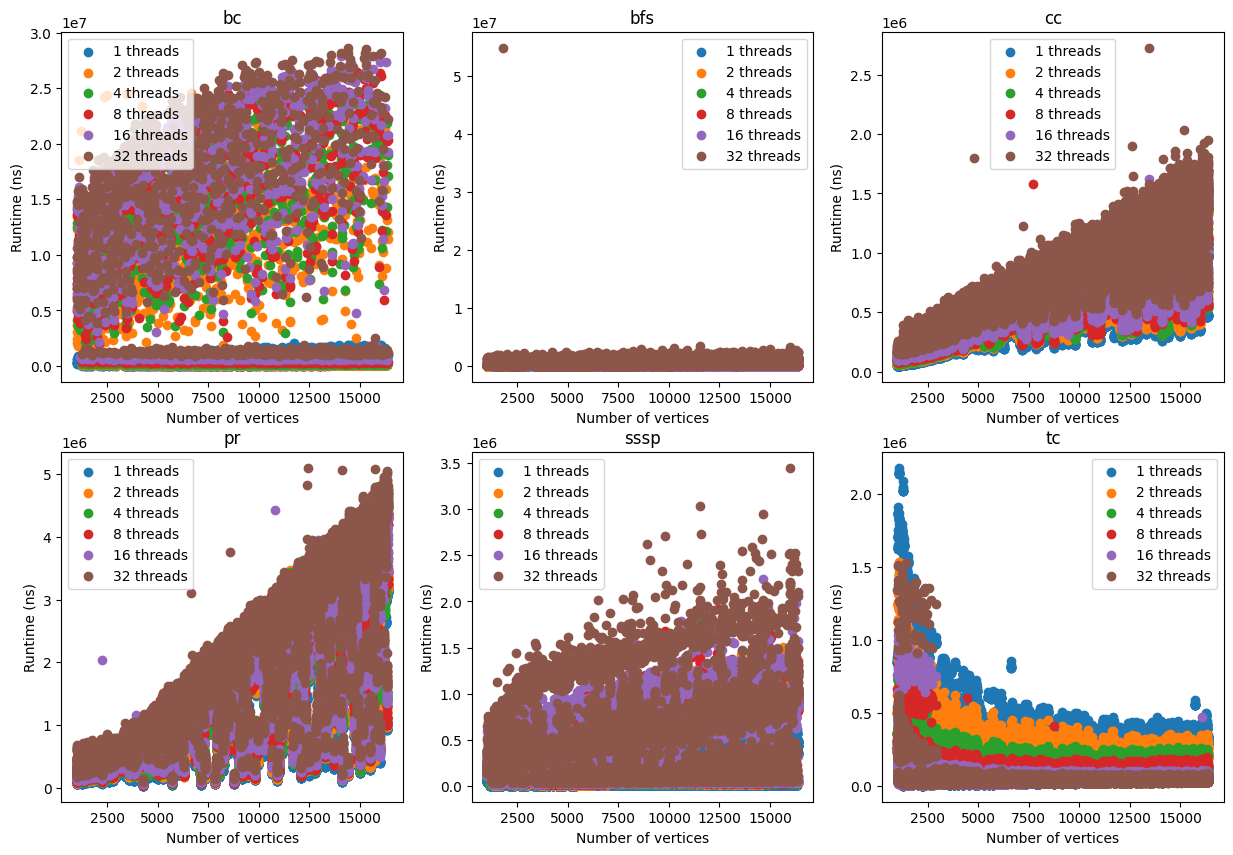

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

def plot_bgo(x):
    i, bgo = x
    ax = axs[i//3, i%3]
    for thread in threads:
        df = csv_to_df(f'./{bgo}/output_{thread}_threads.csv')
        y = df['runtime_ns']
        x = df['G.SIZE_VERTS']
        ax.scatter(x, y, label=f'{thread} threads')
    ax.set_title(bgo)
    ax.set_xlabel('Number of vertices')
    ax.set_ylabel('Runtime (ns)')
    ax.legend()

for i, bgo in enumerate(bgos):
    plot_bgo((i, bgo))

plt.show()

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

def plot_3d(bgo, rand_method, threads, singlecc = False):
    ax.clear()

    df = csv_to_df(f'./random/{bgo}/{rand_method}/output_{threads}_threads.csv')
    df = df.groupby(['G.SIZE_VERTS', 'G.SIZE_EDGES']).mean('runtime_ns').reset_index()

    df_single_cc = csv_to_df(f'./single_cc/{bgo}/{rand_method}/output_{threads}_threads.csv')
    df_single_cc = df_single_cc.groupby(['G.SIZE_VERTS', 'G.SIZE_EDGES']).mean('runtime_ns').reset_index()

    df_konect = pd.read_csv(f'./konect/{bgo}/output_{threads}_threads.csv')
    df_konect = df_konect.groupby(['G.SIZE_VERTS', 'G.SIZE_EDGES']).mean('runtime_ns').reset_index()

    x = df['G.SIZE_VERTS']
    y = df['G.SIZE_EDGES']
    z = df['runtime_ns']

    x_single_cc = df_single_cc['G.SIZE_VERTS']
    y_single_cc = df_single_cc['G.SIZE_EDGES']
    z_single_cc = df_single_cc['runtime_ns']

    x_konect = df_konect['G.SIZE_VERTS']
    y_konect = df_konect['G.SIZE_EDGES']
    z_konect = df_konect['runtime_ns']

    ax.scatter(x, y, z)
    ax.scatter(x_single_cc, y_single_cc, z_single_cc, color='green', label='single cc')
    # ax.scatter(x_konect, y_konect, z_konect, color='red', label='konect graphs')
    ax.set_xlabel('Number of vertices')
    ax.set_ylabel('Number of edges')
    ax.set_zlabel('Runtime (ns)')

    plt.legend()
    plt.show()

interact(plot_3d, bgo=bgos, rand_method=['gnm', 'sw'], threads=threads, singlecc=True)

interactive(children=(Dropdown(description='bgo', options=('bc', 'bfs', 'cc', 'pr', 'sssp', 'tc'), value='bc')…

<function __main__.plot_3d(bgo, rand_method, threads, singlecc=False)>